In [1]:
# Import necessary libraries
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing Pandas for data manipulation and analysis
import matplotlib.pyplot as plt # Importing Matplotlib's pyplot module for creating plots
import seaborn as sns  # Importing Seaborn for statistical data visualization

# Set Seaborn plotting style and context
sns.set(style='ticks', context='notebook', font_scale=1.2)
# Setting Seaborn's plotting style to 'ticks', context to 'notebook', and font scale to 1.2

In [2]:
# Read data from a CSV file into a Pandas DataFrame
data = pd.read_csv(r"long_NR.txt", header=None)
# The data is read from the file "long_NR.txt" with no header row

# Remove the first 7 rows from the DataFrame
data = data.iloc[7:]
# Remove the first 7 rows, effectively skipping metadata or unwanted content

# Split the values in the first column of the DataFrame
split_data = data[0].str.split()
# Splitting the values in the first column into separate elements

# Convert split data to a list of lists
data = split_data.to_list()
# Converting the split data into a list of lists

# Define column names for the DataFrame
names = ['#', "Length", "Width"]
# Creating a list of column names

# Create a new DataFrame using the split data and column names
df = pd.DataFrame(data, columns=names, index=None)
# Creating a DataFrame using the split data and assigning column names
# No specific index is provided, so the default index is used

# Convert 'Length' and 'Width' columns to numeric data types
df['Length'] = pd.to_numeric(df['Length'])
df['Width'] = pd.to_numeric(df['Width'])
# Converting the 'Length' and 'Width' columns to numeric data types

# Calculate the aspect ratio ('AR') by dividing 'Length' by 'Width'
df.loc[:, 'AR'] = np.abs(df.loc[:, 'Length'] / df.loc[:, 'Width'])
# Adding a new column 'AR' to the DataFrame that contains the calculated aspect ratios
# np.abs() is used to ensure positive aspect ratios

# Display the resulting DataFrame 'df' with calculated aspect ratios
df

,#,Length,Width,AR
0,0,51.244605,14.874580,3.445113
1,1,31.627818,7.232381,4.373085
2,2,36.576462,9.522714,3.840971
3,3,37.786586,10.323480,3.660256
4,4,33.245529,8.928031,3.723725
...,...,...,...,...
803,803,37.850511,10.176442,3.719425
804,804,36.529104,9.778358,3.735710
805,805,41.982857,11.354992,3.697304
806,806,38.309715,10.267694,3.731092


In [3]:
# Calculate the mean values of each column in the DataFrame 'df'
df. mean()

#               inf
Length    38.900324
Width      9.945946
AR         3.951307
dtype: float64

In [4]:
# Calculate the standard deviation values of each column in the DataFrame 'df'
df. std()

Length    5.476710
Width     1.846596
AR        0.365072
dtype: float64

c:\users\moien\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\moien\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


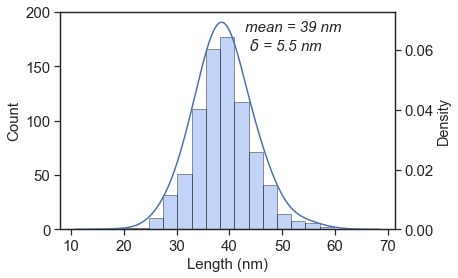

In [6]:
# Seaborn histogram with KDE overlay
data = df['Length']
ax = sns.distplot(data, kde=False, hist_kws={'edgecolor':'black', 'facecolor':'cornflowerblue','color':'b'},bins=15)
ax.set_ylim([0,200])
# ax.set_title('Long AuNRs', fontsize=15)

# Set labels, title, and tick sizes for the primary y-axis
ax.set_xlabel(xlabel='Length (nm)',fontsize=15)
ax.set_ylabel(ylabel='Count',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel('Density', fontsize=15)
ax2.set_ylim([0,0.08])
ax2.set_xlim([10,60])

# Create a twin Axes for the KDE plot
ax2 = plt.twinx()
ax2 = sns.distplot(df['Length'], kde=True, hist=False, ax=ax2, kde_kws={'bw_adjust': 2})

ax2.tick_params(axis='both', which='major', labelsize=15)

#Adding text without box on the plot.
ax.text(43, 165, 'mean = 39 nm\n $\delta$ = 5.5 nm', style='italic',size='15')


# plt.savefig("length_longNR.png", bbox_inches='tight',dpi=300)
plt.show()

c:\users\moien\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\moien\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


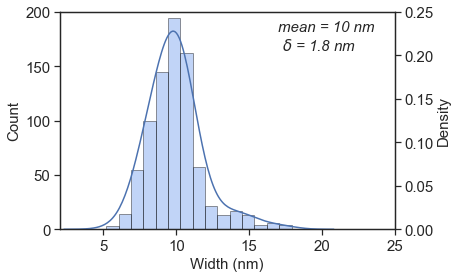

In [15]:
# seaborn histogram
ax = sns.distplot(df['Width'], kde=False, hist_kws={'edgecolor':'black', 'facecolor':'cornflowerblue','color':'b'},bins=15)
ax.set_ylim([0,200])
# ax.set_title('Long AuNRs', fontsize=15)

ax.set_xlabel(xlabel='Width (nm)',fontsize=15)
ax.set_ylabel(ylabel='Count',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax2 = plt.twinx()
ax2 = sns.distplot(df['Width'], kde=True, hist=False, ax=ax2, kde_kws={'bw_adjust': 2})

ax2.set_ylabel('Density', fontsize=15)
ax2.set_xlim([2,25])
ax2.set_ylim([0,0.25])

ax2.tick_params(axis='both', which='major', labelsize=15)

#Adding text without box on the plot.
ax.text(17, 165, 'mean = 10 nm\n $\delta$ = 1.8 nm', style='italic',size='15')


# plt.savefig("Width_longNR.png", bbox_inches='tight',dpi=300)
plt.show()

c:\users\moien\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\moien\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


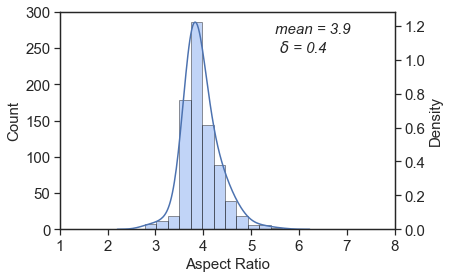

In [16]:
# seaborn histogram
ax = sns.distplot(df['AR'], kde=False, hist_kws={'edgecolor':'black', 'facecolor':'cornflowerblue','color':'b'},bins=12)
ax.set_ylim([0,300])
# ax.set_title('Long AuNRs', fontsize=15)

ax.set_xlabel(xlabel='Aspect Ratio',fontsize=15)
ax.set_ylabel(ylabel='Count',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax2 = plt.twinx()
# ax2 = sns.distplot(df['AR'], kde=True, hist=False, ax=ax2)
ax2 = sns.distplot(df['AR'], kde=True, hist=False, ax=ax2, kde_kws={'bw_adjust': 2})
ax2.set_ylabel('Density', fontsize=15)
ax2.set_xlim([1,8])

ax2.tick_params(axis='both', which='major', labelsize=15)

#Adding text without box on the plot.
ax.text(5.5, 245, 'mean = 3.9 \n $\delta$ = 0.4 ', style='italic',size='15')

# plt.savefig("AR_longNR.png", bbox_inches='tight',dpi=300)
plt.show()